<a href="https://colab.research.google.com/github/shivagamings2005/face-detection/blob/main/face_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

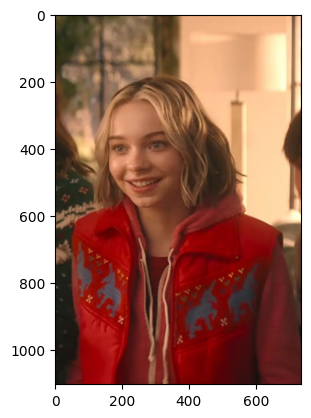

In [ ]:
img=cv2.imread("/content/drive/MyDrive/image detect/emma myers/'Bachelor in Paradise' Season 9_ Where to Get All the Outfits — Femestella.jpeg")
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

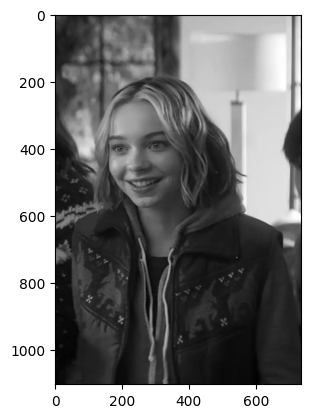

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [ ]:
face_cascade=cv2.CascadeClassifier("/content/drive/MyDrive/opencv/haarcascade_frontalface_default.xml")
face=face_cascade.detectMultiScale(gray,1.1,5)
face

array([[116, 292, 264, 264]], dtype=int32)

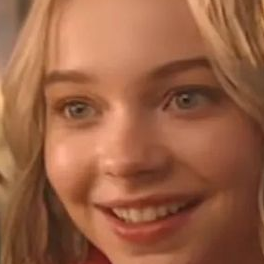

In [ ]:
x,y,w,h=face[0]
rec=img[y:y+h,x:x+w]
cv2_imshow(rec)

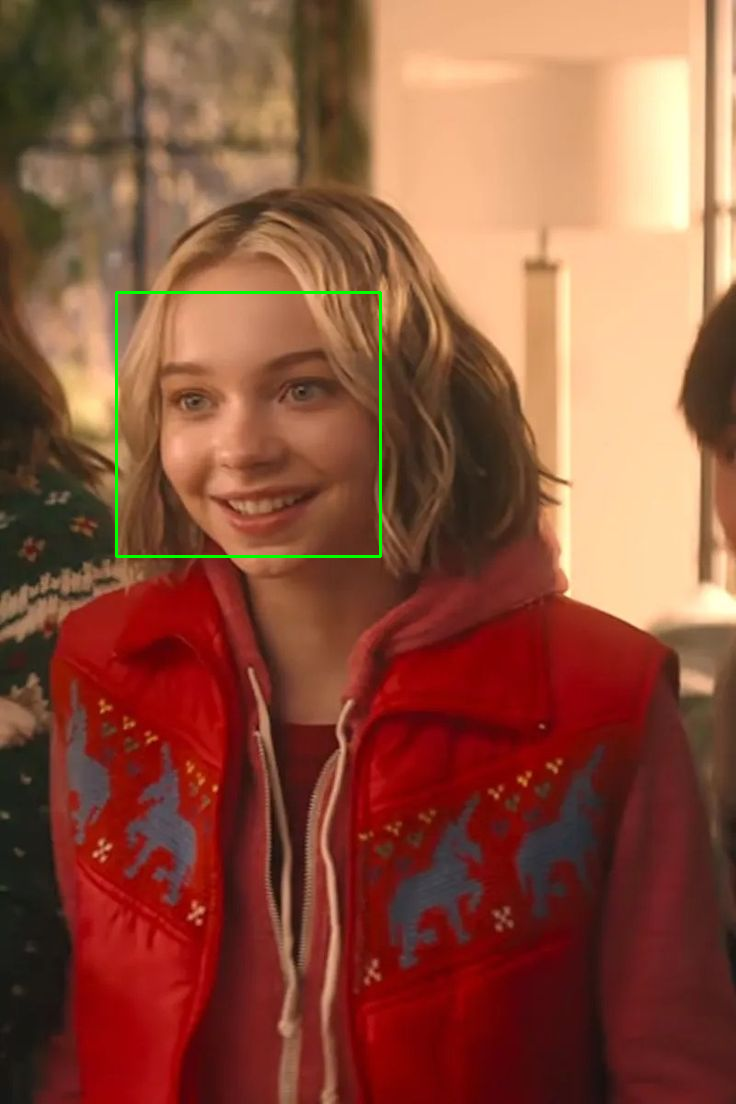

In [ ]:
rec2=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(rec2)

In [ ]:
eye_cascade=cv2.CascadeClassifier("/content/drive/MyDrive/opencv/haarcascade_eye.xml")
for x,y,w,h in face:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  face_color=img[y:y+h,x:x+w]
  eyes=eye_cascade.detectMultiScale(face_color,1.1,5)
  for x1,y1,w1,h1 in eyes:
    eye_img=cv2.rectangle(face_color,(x1,y1),(x1+w1,y1+h1),(255,0,255),2)

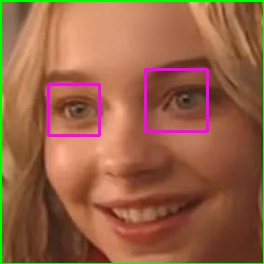

In [ ]:
cv2_imshow(eye_img)

In [ ]:
def detect_all(path):
  img=cv2.imread(path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face=face_cascade.detectMultiScale(gray,1.1,5)
  for x,y,w,h in face:
    face_gray=gray[y:y+h,x:x+w]
    face_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(face_gray,1.1,5)
    if len(eyes)>=2:
      return face_color

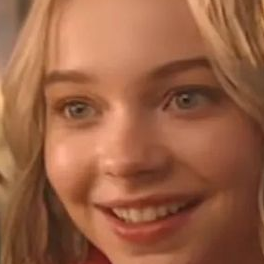

In [ ]:
img3=detect_all("/content/drive/MyDrive/image detect/emma myers/'Bachelor in Paradise' Season 9_ Where to Get All the Outfits — Femestella.jpeg")
cv2_imshow(img3)

In [ ]:
img3=detect_all("/content/drive/MyDrive/image detect/emma myers/𝑙𝑜𝑐𝑘𝑠𝑐𝑟𝑒𝑒𝑛𝑠.jpeg")
img3

In [ ]:
data_path="/content/drive/MyDrive/image detect/"
face_path="/content/drive/MyDrive/filtered_images/"

In [ ]:
import os
dir=[]
for i in os.scandir(data_path):
  if i.is_dir():
    dir.append(i.path)
dir

['/content/drive/MyDrive/image detect/robert downey jr',
 '/content/drive/MyDrive/image detect/chris hemsworth',
 '/content/drive/MyDrive/image detect/emma myers',
 '/content/drive/MyDrive/image detect/pepper potts',
 '/content/drive/MyDrive/image detect/Benedict Cumberbatch']

In [ ]:
"""import shutil
if os.path.exists(face_path):
  shutil.rmtree(face_path)
os.mkdir(face_path)"""

In [ ]:
cropped_img=[]
img_names_path={}
for i in dir:
  c=1
  name=i.split("/")[-1]
  print(name)
  img_names_path[name]=[]
  name_folder=face_path+name
  if not os.path.exists(name_folder):
    os.mkdir(name_folder)
    cropped_img.append(name_folder)
  for j  in os.scandir(i):
    img=detect_all(j.path)
    if img is not None:
      img_name=name+str(c)+".png"
      c+=1
      img_path=name_folder+"/"+img_name
      img_names_path[name].append(img_path)
      cv2.imwrite(img_path,img)

robert downey jr
chris hemsworth
emma myers
pepper potts
Benedict Cumberbatch


In [ ]:
cropped_img=[]
img_names_path={}
for i in dir:
  c=1
  name=i.split("/")[-1]
  print(name)
  img_names_path[name]=[]
  name_folder=face_path+name